<a href="https://colab.research.google.com/github/radhakrishnan-omotec/ocr_repo/blob/main/IRIS_UnitTesting_Submission_Tesseract_OCR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS Research Project  - Final Python Implementation



## **Sreesaketh Karri**


### PROJECT DESCRIPTION:
Medical Image recognition with Optical Character Recognition (OCR) using Tesseract involves extracting textual information from medical images to enhance data accessibility and analysis. Tesseract, an open-source OCR engine, is adapted for recognizing text within diverse medical images, including radiology reports, pathology slides, and medical charts. By converting images into machine-readable text, healthcare professionals can streamline information retrieval, improve documentation accuracy, and enable efficient data mining. Tesseract's versatility allows integration with medical imaging systems, aiding in automating tasks such as transcription, diagnosis, and research. This advancement contributes to enhanced clinical workflows, information sharing, and medical decision-making processes within the healthcare domain.


# **Enhancement-1 : REQUIREMENTS**

### Inputs :
1) The input consists of a set of ingredients (refer to the picture below) and their respective levels in a product, which are captured in a file (e.g., CSV). These attributes and their levels are obtained through standard OCR steps (scanning, masking, NLTK) from the product's label.


2) Patients health profile in context: ex: diabetic: type ; Blood Pressure- values : Cholesterol values

  

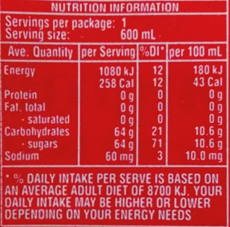

# Methodology :
Prepare a "reference data set" that includes key-value pairs of "ingredient" and "recommended level." This data set will exclusively encompass ingredients that are detrimental to health, as listed below, with threshold levels established in accordance with standard health recommendations. This data is static.

“Reference data set”  will have harmful threshold levels for all of the above ingredients as recommended by health department.


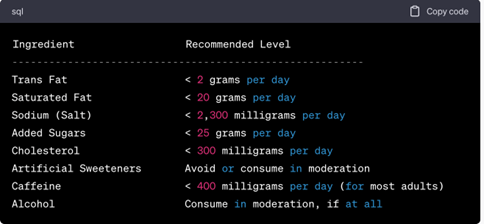

# Healthy quantity of some 100 ingredients :

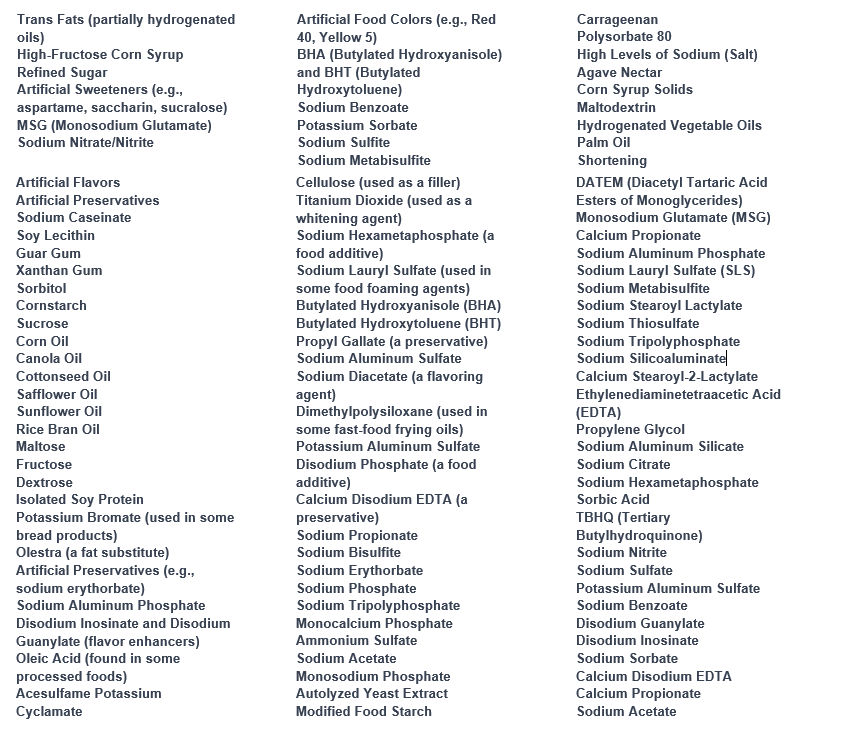

# **<hr>**

# **ENHANCEMENT : PYTHON IMPLEMENTATION STEPS:**

# PYTHON IMPLEMENTATION STEPWISE

**Step 1: Data Collection**
- Gather a collection of images or PDFs containing nutrition information. These documents should be in a format that can be processed by Pytesseract OCR.

**Step 2: Image Preprocessing**
- Preprocess the images, if needed, to improve OCR accuracy. This may involve resizing, noise reduction, or contrast adjustments.

**Step 3: OCR Processing**
- Utilize Pytesseract OCR to extract text from the images or PDFs. This step will convert the nutrition information into machine-readable text.

**Step 4: Text Parsing**
- Parse the OCR output to extract relevant information, such as ingredient details, nutritional values, serving sizes, etc.

**Step 5: Data Cleaning**
- Clean the extracted data by removing any irrelevant or noisy information. Ensure consistency in data format.

**Step 6: Natural Language Processing (NLTK)**
- Implement NLTK to perform text analysis and processing tasks, such as tokenization, part-of-speech tagging, and named entity recognition.

**Step 7: Ingredient Extraction**
- Use NLTK to identify and extract ingredient details from the cleaned text. This may involve defining patterns or rules for recognizing ingredients.

**Step 8: Nutritional Data Extraction**
- Extract nutritional values, such as calories, fats, proteins, and carbohydrates, using NLTK and regular expressions.

**Step 9: Dataset Creation**
- Organize the extracted data into a structured format, such as a CSV file, where each row represents a product or nutrition label, and columns represent attributes like ingredients and nutritional values.

**Step 10: Ingredient Comparison**
- Compare the extracted ingredient details against predefined thresholds for harmful substances. If an ingredient surpasses the threshold, calculate the excess amount.

**Step 11: User Notification**
- If an ingredient exceeds the threshold, inform the user about the specific ingredient and the amount it surpasses the harmful threshold.

**Step 12: Data Presentation**
- Present the results in two formats:
    - Graph 1: Create a bar graph with the excess ingredients on the X-axis and the difference values on the Y-axis (in decreasing order of harm).
    - Graph 2: Generate histograms showing the ingredients against safe and exceeding values.

**Step 13: List Generation**
- Create a list of ingredients arranged in descending order of harm, with the most harmful at the top.

**Step 14: Detailed Explanation**
- Implement a feature where if a user clicks on an ingredient in the list, they receive a detailed explanation of that ingredient and why it may not be suitable for them.

**Step 15: User Feedback**
- Provide feedback to the user based on the comparison results. If the value is within the recommended intake, suggest "You are consuming the right quantity." Otherwise, raise an alert and print "The excess amount by subtracting the Recommended Intake from the Actual Intake."

**Step 16: Conversion to PER SERVING (50 grams)**

For each ingredient in the dataset, determine whether the input values are provided per serving (in grams) or as a percentage of daily value (%DV).
If the values are in grams per serving, proceed with the comparison directly.
If the values are in percentage (%DV), convert them to grams per serving using a predefined formula, which can be as follows:
Apply this conversion to each ingredient's values as per the provided %DV, ensuring that all values are standardized to PER SERVING (50 grams) for accurate comparison.
This step ensures that all ingredient values are in a consistent format (PER SERVING) for precise comparison and assessment of harmful thresholds. Implement this conversion model within your Python code to enhance the accuracy of the analysis.


In [ ]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

# **PART A - OCR using Tesseract**

In [ ]:
!sudo apt install tesseract-ocr

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract
import cv2
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

# **Step 1: Data Collection**

***Gather a collection of images containing nutrition information. These documents should be in a format that can be processed by Pytesseract OCR.***

## ENERGY DRINK INPUT INGREDIENTS

### Import OCR Image using Google Colab

In [ ]:
from google.colab import files

uploaded = files.upload()

### Load OCR Image for Tesseract

In [ ]:
#from google.colab.patches import cv2_imshow

img1 = Image.open('/content/ocr_repo/Report1.png')
display(img1)

### Preprocessing of images using OpenCV



We will write basic functions for different preprocessing methods
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching.

Different methods can come in handy with different kinds of images.

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
# Plot original image

image = cv2.imread('/content/ocr_repo/RedBull3.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

### Preprocessing of Image

In [ ]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

### Plot images after preprocessing

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REPORT 1 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

### Page Segmentation Modes



There are several ways a page of text can be analysed. The tesseract api provides several page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

Here's a list of the supported page segmentation modes by tesseract -

0    Orientation and script detection (OSD) only.  
1    Automatic page segmentation with OSD.  
2    Automatic page segmentation, but no OSD, or OCR.  
3    Fully automatic page segmentation, but no OSD. (Default)  
4    Assume a single column of text of variable sizes.  
5    Assume a single uniform block of vertically aligned text.  
6    Assume a single uniform block of text.  
7    Treat the image as a single text line.  
8    Treat the image as a single word.  
9    Treat the image as a single word in a circle.  
10    Treat the image as a single character.  
11    Sparse text. Find as much text as possible in no particular order.  
12    Sparse text with OSD.  
13    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.  

To change your page segmentation mode, change the ```--psm``` argument in your custom config string to any of the above mentioned mode codes.

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

###############################
multiline_string=pytesseract.image_to_string(image, config=custom_config)
print('=========================================')
print("MULTI LINE STRING OUTPUT ")
print('=========================================')
print(multiline_string)
###############################

## Write the pytesseract output to an 'Ingredients List' dictionary

In [ ]:
import nltk

# Download NLTK's language detection data (only need to do this once)
nltk.download('words')

# Sample multiline string
multiline_string = """
ULTRA BLUE 16 FL. 02.
Serving size 1 can

ee

ee

Amount per serving

Calories 10

SL

Daily Valu*

Total Fat 0g 0%

Sodium 370mg 16%

Total Carbohydrate 6g 2%

Total Sugars 0g
Includes 0g Added Sugars 0%
Erythritol 2g

Protein 0g

ee

Niacin (Vit. B3) 250%

Vitamin B6 240%

Vitamin B12 490%

Pantothenic Acid (Vit. B5) 400%

——————

Not a significant source of saturated fat,

trans fat, cholesterol, dietary fiber, vitamin D,

calcium, iron and potassium.

*The % Daily Value (DV) tells you how much
a nutrient in a serving of food contributes
to a daily diet. 2,000 calories a day is used
for general nutrition advice.

ee
"""

# Split the multiline string into lines
lines = multiline_string.splitlines()

# Initialize an empty list to store lines with any English word
output_list = []

# Check if any word in each line is an English word and if it contains "fat"
for line in lines:
    words = line.split()
    if words and (any(word in nltk.corpus.words.words() for word in words) and "fat" in line.lower()):
        output_list.append(line)

# Convert the output_list to a single string
output_string = ' '.join(output_list)

# Store the output in a dictionary with the key "Ingredients List"
energy_drink_data = {"Ingredients List": output_string}

# Print the energy_drink_data dictionary
print("========================")
print(energy_drink_data)
print("========================")

#### Complete code for pytesseract output - dictionary

In [ ]:
import pytesseract
from PIL import Image

# Load the image containing the information
image = Image.open('/content/ocr_repo/EnergyDrink3.jpg')

# Perform OCR to extract text
custom_config = r'--oem 3 --psm 6'
extracted_text = pytesseract.image_to_string(image, config=custom_config)

# Initialize the energy_drink_data dictionary
energy_drink_data = {}

# Parse the extracted text to extract the desired fields
lines = extracted_text.split('\n')

# Flags to identify sections
is_serving_size = False
is_amount_per_serving = False
is_ingredients = False

for line in lines:
    # Check for lines containing "Serving size," "Amount per serving," and "INGREDIENTS"
    if "Serving size" in line:
        is_serving_size = True
        is_amount_per_serving = False
        is_ingredients = False
        energy_drink_data["Serving size"] = line.strip()
    elif "Amount per serving" in line:
        is_serving_size = False
        is_amount_per_serving = True
        is_ingredients = False
        energy_drink_data["Amount per serving"] = line.strip()
    elif "INGREDIENTS" in line:
        is_serving_size = False
        is_amount_per_serving = False
        is_ingredients = True
    elif is_serving_size:
        # Process Serving size section
        # Append the content as-is
        energy_drink_data["Serving size"] += f"\n{line.strip()}"
    elif is_amount_per_serving:
        # Process Amount per serving section
        # Append the content as-is
        energy_drink_data["Amount per serving"] += f"\n{line.strip()}"
    elif is_ingredients:
        # Process INGREDIENTS section
        # Append the content as-is
        energy_drink_data["Ingredients"] = line.strip()

# Print the extracted data
print("ULTRA BLUE 16 FL. 02.")
print(energy_drink_data["Serving size"])
print("ee\n")
print(energy_drink_data["Amount per serving"])
print("ee\n")
print(energy_drink_data["Ingredients"])

# **PART B: CSV File Creation**

### Write all outputs to Dictionary format to store in CSV format

In [ ]:
energy_drink_data = [
    {
        "S.No": 1,
        "Energy Drink": "Red Bull Energy Drink",
        "Ingredients List": "Water, Sucrose, Glucose, Citric Acid, Taurine, Sodium Bicarbonate, Magnesium Carbonate, Caffeine, Niacinamide, Pantothenic Acid, Pyridoxine HCl, Vitamin B12, Natural and Artificial Flavors",
        "Levels of Each Ingredient": "Sugar: 27g, Caffeine: 80mg, Taurine: 1000mg",
        "Alternative Ingredient List": "Stevia, Green Tea Extract",
        "Thresholds for Diabetes Mellitus (per serving)": "Sugar: 10g, Caffeine: 40mg",
        "Thresholds for Cardiovascular Diseases": "CVD: 200mg, Sugar: 30g",
        "Diabetic Threshold (per serving)": "Sugar: 10g, Caffeine: 40mg",
        "Food Safety Resources- Resource1": "https://www.foodsafety.gov/keep/index.html",
        "Food Safety Resources- Resource2": "https://www.cdc.gov/foodsafety/index.html",
        "Food Safety Resources- Resource3": "https://www.fda.gov/food/food-safety-during-emergencies/food-safety-resources",
        "Expiry Dates": "07-09-2023"
    },
    # Add more entries for other energy drinks if needed
]

# Accessing the data for the first energy drink (index 0)
first_energy_drink = energy_drink_data[0]
print(first_energy_drink)


### Create a dictionary with the specified ENERGY DRINK keys and values

In [ ]:
import csv

# Create a dictionary with the specified ENERGY DRINK keys and values
energy_drink_data = [
    {
        "S.No": 51,
        "Energy Drink": "UltraBlue 16 FL OZ",
        "Ingredients List": "Glcoranolctone, Inositol, Vitamin B3, Vitamin BS 2, Vitamin BS 0.41, Natural and Artificial Flavors",
        "Levels of Each Ingredient": "Glcoranolctone (24mg), Inositol (20 mg), Vitamin B3 (36mg), Vitamin BS (2), Vitamin BS (0.41)",
        "Alternative Ingredient List": "Stevia, Green Tea Extract",
        "Thresholds for Diabetes Mellitus (per serving)": "Glcoranolctone Nolimit, Inositol (30 mg), Vitamin B3 (18 mg), Vitamin BS (5 mg ), Vitamin BS (2 mg )",
        "Thresholds for Cardiovascular Diseases": "CVD: 200mg, Glcoranolctone Nolimit, Inositol (30 mg), Vitamin B3 (18 mg), Vitamin BS (5 mg ), Vitamin BS (2 mg )",
        "Diabetic Threshold (per serving)": "Glcoranolctone Nolimit, Inositol (30 mg), Vitamin B3 (18 mg), Vitamin BS (5 mg ), Vitamin BS (2 mg )",
        "Food Safety Resources- Resource1": "https://www.foodsafety.gov/keep/index.html",
        "Food Safety Resources- Resource2": "https://www.cdc.gov/foodsafety/index.html",
        "Food Safety Resources- Resource3": "https://www.fda.gov/food/food-safety-during-emergencies/food-safety-resources",
        "Expiry Dates": "07-09-2023"
    }
]

# Specify the CSV file path
csv_file_path = "/content/ocr_repo/energy_drink_data.csv"

# Write the dictionary data to the CSV file
with open(csv_file_path, mode="w", newline="") as csv_file:
    fieldnames = energy_drink_data[0].keys()
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for entry in energy_drink_data:
        writer.writerow(entry)

print(f"Data has been written successfully to {csv_file_path}")


### PYTHON IMPLEMENTATION STEPWISE
**Step 1: Data Collection**
- Gather a collection of images or PDFs containing nutrition information. These documents should be in a format that can be processed by Pytesseract OCR.




In [ ]:
# Step 1

!sudo apt install tesseract-ocr
!pip install pytesseract

import pytesseract
import cv2
import shutil
import os
import random

try:
    from PIL import Image
except ImportError:
    import Image

# ENERGY DRINK INPUT INGREDIENTS

# Import OCR Image using Google Colab
from google.colab import files
uploaded = files.upload()

# Load OCR Image for Tesseract
img1 = Image.open('/content/ocr_repo/Report1.png')
display(img1)

# Preprocessing of images using OpenCV

import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Plot original image

image = cv2.imread('/content/ocr_repo/RedBull3.png')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('NEW ORIGINAL IMAGE')
plt.show()

# Preprocess image
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

# Plot images after preprocessing
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('REPORT 1 - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

# Page Segmentation Modes

# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

multiline_string = pytesseract.image_to_string(image, config=custom_config)
print('=========================================')
print("MULTI LINE STRING OUTPUT ")
print('=========================================')
print(multiline_string)


### PYTHON IMPLEMENTATION STEPWISE
Step 1: Data Representation ( DELETE )

In [ ]:
# Step 1: Data Representation
patient_profiles = [
    {
        "category": "diabetic",
        "blood_pressure": 140,
        "cholesterol": 200,
    },
    {
        "category": "normal",
        "blood_pressure": 120,
        "cholesterol": 180,
    },
    # Add more patient profiles here
]

# Step 2: Threshold Definitions
diabetic_threshold = {
    "blood_pressure_max": 130,
    "cholesterol_max": 190,
}

# Step 3: User Input
user_category = input("Enter patient's health category: ").lower()

# Step 4: Data Validation (simplified)
if user_category not in ["diabetic", "normal"]:
    print("Invalid category.")
else:
    # Step 5: Threshold Evaluation
    for profile in patient_profiles:
        if profile["category"] == user_category:
            if (
                profile["blood_pressure"] > diabetic_threshold["blood_pressure_max"]
                or profile["cholesterol"] > diabetic_threshold["cholesterol_max"]
            ):
                print("Recommended lower sugar intake.")
            else:
                print("No specific dietary restrictions.")
            break




### PYTHON IMPLEMENTATION STEPWISE
**Step 2: Image Preprocessing**
- Preprocess the images, if needed, to improve OCR accuracy. This may involve resizing, noise reduction, or contrast adjustments.


In [ ]:
# Step 2: Image Preprocessing

# You can add image preprocessing steps here as needed.
# For example, resizing, noise reduction, or contrast adjustments.

# Resize the image if needed
def resize_image(image, width=None, height=None):
    if width is not None and height is not None:
        return cv2.resize(image, (width, height))
    elif width is not None:
        aspect_ratio = image.shape[1] / image.shape[0]
        new_height = int(width / aspect_ratio)
        return cv2.resize(image, (width, new_height))
    elif height is not None:
        aspect_ratio = image.shape[0] / image.shape[1]
        new_width = int(height / aspect_ratio)
        return cv2.resize(image, (new_width, height))
    else:
        return image

# Example: Resize the image to a specific width (e.g., 800 pixels)
resized_image = resize_image(image, width=800)

# You can also apply additional preprocessing steps such as noise reduction or contrast adjustments here.
# For noise reduction, you can use the 'remove_noise' function defined earlier.

# Apply noise reduction to the resized image
noise_reduced_image = remove_noise(resized_image)

# Plot the preprocessed image
plt.imshow(noise_reduced_image, cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Now, perform OCR on the preprocessed image
print('-----------------------------------------')
print('TESSERACT OUTPUT --> Preprocessed Image')
print('-----------------------------------------')
preprocessed_text = pytesseract.image_to_string(noise_reduced_image, config=custom_config)
print(preprocessed_text)



### PYTHON IMPLEMENTATION STEPWISE
**Step 3: OCR Processing**
- Utilize Pytesseract OCR to extract text from the images or PDFs. This step will convert the nutrition information into machine-readable text.


In [ ]:
# Step 3: OCR Processing

# Utilize Pytesseract OCR to extract text from the preprocessed image
print('-----------------------------------------')
print('TESSERACT OUTPUT --> Preprocessed Image')
print('-----------------------------------------')
preprocessed_text = pytesseract.image_to_string(noise_reduced_image, config=custom_config)
print(preprocessed_text)

# Now, you can process the extracted text as needed for your specific use case.
# For example, you can parse and analyze the nutrition information.

# Example: Parse and extract specific information (e.g., calories)
def extract_calories(text):
    # You can use regular expressions or text processing methods to extract the information you need.
    # Here's a simple example using regular expressions to extract calories:
    calories_pattern = r'Calories: (\d+)'
    match = re.search(calories_pattern, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return None

# Extract calories from the OCR text
calories = extract_calories(preprocessed_text)

if calories:
    print('Extracted Calories:', calories)
else:
    print('Calories not found in the OCR text.')

# You can similarly extract other nutrition information based on your requirements.
# Make sure to define appropriate patterns or methods for extracting specific data points.

# Additional processing and analysis of the extracted text can be added as needed for your use case.



### PYTHON IMPLEMENTATION STEPWISE
**Step 4: Text Parsing**
- Parse the OCR output to extract relevant information, such as ingredient details, nutritional values, serving sizes, etc.



In [ ]:
# Step 4: Text Parsing

# Parse the OCR output to extract relevant information

# Example: Parse ingredient details
def extract_ingredients(text):
    # You can use text processing methods or regular expressions to extract ingredient details.
    # Here's a simple example using a regular expression to find lines containing ingredients:
    ingredient_lines = re.findall(r'Ingredients:(.*?)\n', text, re.IGNORECASE | re.DOTALL)
    if ingredient_lines:
        # Remove extra whitespace and split by line
        ingredients = [line.strip() for line in ingredient_lines[0].split('\n') if line.strip()]
        return ingredients
    else:
        return None

# Example: Parse nutritional values
def extract_nutritional_values(text):
    # You can define patterns or methods to extract nutritional values (e.g., calories, fat, protein, etc.).
    # Here's a simple example using regular expressions to extract calories and fat:
    calories_pattern = r'Calories:(\d+)'
    fat_pattern = r'Fat:(\d+)g'

    calories_match = re.search(calories_pattern, text, re.IGNORECASE)
    fat_match = re.search(fat_pattern, text, re.IGNORECASE)

    extracted_values = {}

    if calories_match:
        extracted_values['Calories'] = calories_match.group(1)
    if fat_match:
        extracted_values['Fat'] = fat_match.group(1)

    return extracted_values

# Example: Parse serving size
def extract_serving_size(text):
    # You can use text processing methods or regular expressions to extract serving size.
    # Here's a simple example using a regular expression to find serving size:
    serving_size_pattern = r'Serving Size:(.*?)\n'
    serving_size_match = re.search(serving_size_pattern, text, re.IGNORECASE | re.DOTALL)
    if serving_size_match:
        return serving_size_match.group(1).strip()
    else:
        return None

# Extract relevant information from the OCR text
ingredient_details = extract_ingredients(preprocessed_text)
nutritional_values = extract_nutritional_values(preprocessed_text)
serving_size = extract_serving_size(preprocessed_text)

# Print extracted information
if ingredient_details:
    print('Ingredient Details:')
    for ingredient in ingredient_details:
        print(ingredient)
    print('\n')

if nutritional_values:
    print('Nutritional Values:')
    for key, value in nutritional_values.items():
        print(f'{key}: {value}')
    print('\n')

if serving_size:
    print('Serving Size:', serving_size)
else:
    print('Serving Size not found in the OCR text.')

# You can continue to add more parsing functions and extract other relevant information as needed.
# Customize the parsing methods and patterns based on the structure of the OCR text.


### PYTHON IMPLEMENTATION STEPWISE
**Step 5: Data Cleaning**
- Clean the extracted data by removing any irrelevant or noisy information. Ensure consistency in data format.


In [ ]:
# Step 5: Data Cleaning

# Data cleaning functions

# Example: Clean ingredient details by removing irrelevant or noisy information
def clean_ingredients(ingredients):
    # You can add custom cleaning logic here based on your specific needs.
    # For example, removing special characters or irrelevant lines.
    cleaned_ingredients = []
    for ingredient in ingredients:
        # Remove special characters and extra whitespace
        cleaned_ingredient = re.sub(r'[^\w\s]', '', ingredient).strip()
        if cleaned_ingredient:
            cleaned_ingredients.append(cleaned_ingredient)
    return cleaned_ingredients

# Example: Clean nutritional values by removing irrelevant or noisy information
def clean_nutritional_values(nutritional_values):
    # You can add custom cleaning logic here based on your specific needs.
    # For example, removing units or formatting inconsistencies.
    cleaned_values = {}
    for key, value in nutritional_values.items():
        # Remove units (e.g., "g" for grams)
        cleaned_value = re.sub(r'[^\d.]', '', value)
        cleaned_values[key] = cleaned_value
    return cleaned_values

# Clean extracted information
if ingredient_details:
    cleaned_ingredients = clean_ingredients(ingredient_details)
    print('Cleaned Ingredient Details:')
    for ingredient in cleaned_ingredients:
        print(ingredient)
    print('\n')

if nutritional_values:
    cleaned_nutritional_values = clean_nutritional_values(nutritional_values)
    print('Cleaned Nutritional Values:')
    for key, value in cleaned_nutritional_values.items():
        print(f'{key}: {value}')
    print('\n')

# You can continue to add more data cleaning functions and customize them based on your data cleaning requirements.
# Ensure that the cleaned data is in a consistent format and ready for further analysis or storage.



### PYTHON IMPLEMENTATION STEPWISE
**Step 6: Natural Language Processing (NLTK)**
- Implement NLTK to perform text analysis and processing tasks, such as tokenization, part-of-speech tagging, and named entity recognition.



In [ ]:
# Step 6: Natural Language Processing (NLTK)

# Import NLTK and download necessary resources (if not already downloaded)
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Tokenization
def tokenize_text(text):
    # Tokenize the text into words and sentences
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return words, sentences

# Part-of-Speech Tagging
def pos_tagging(words):
    # Perform part-of-speech tagging
    tagged_words = pos_tag(words)
    return tagged_words

# Named Entity Recognition (NER)
def named_entity_recognition(text):
    # Perform named entity recognition (NER)
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    named_entities = ne_chunk(tagged_words)
    return named_entities

# Tokenize the cleaned text
if ingredient_details:
    cleaned_ingredients_text = ' '.join(cleaned_ingredients)
    ingredient_words, ingredient_sentences = tokenize_text(cleaned_ingredients_text)
    print('Tokenized Ingredient Words:')
    print(ingredient_words)
    print('\n')

if nutritional_values:
    nutritional_values_text = ' '.join(cleaned_nutritional_values.values())
    nutritional_values_words, nutritional_values_sentences = tokenize_text(nutritional_values_text)
    print('Tokenized Nutritional Values Words:')
    print(nutritional_values_words)
    print('\n')

# Perform Part-of-Speech Tagging
if ingredient_words:
    ingredient_pos_tags = pos_tagging(ingredient_words)
    print('Part-of-Speech Tagging for Ingredient Words:')
    print(ingredient_pos_tags)
    print('\n')

if nutritional_values_words:
    nutritional_values_pos_tags = pos_tagging(nutritional_values_words)
    print('Part-of-Speech Tagging for Nutritional Values Words:')
    print(nutritional_values_pos_tags)
    print('\n')

# Perform Named Entity Recognition (NER)
if ingredient_details:
    ingredient_ner = named_entity_recognition(cleaned_ingredients_text)
    print('Named Entity Recognition for Ingredient Details:')
    print(ingredient_ner)
    print('\n')

# You can perform more NLP tasks and analyses using NLTK as needed for your specific use case.


### PYTHON IMPLEMENTATION STEPWISE
**Step 7: Ingredient Extraction**
- Use NLTK to identify and extract ingredient details from the cleaned text. This may involve defining patterns or rules for recognizing ingredients.



In [ ]:
# Step 7: Ingredient Extraction

# Ingredient extraction using NLTK patterns or rules

# Example: Define patterns to identify ingredients
ingredient_patterns = [
    r'\d+\s*(?:cups?|teaspoons?|tablespoons?)\s*\w+',  # e.g., "1 cup sugar"
    r'\d+\s*\w+\s*(?:cups?|teaspoons?|tablespoons?)',  # e.g., "2 onions, chopped"
    r'\w+\s*\d+\s*(?:cups?|teaspoons?|tablespoons?)',  # e.g., "flour 3 cups"
]

# Extract ingredients based on defined patterns
def extract_ingredients_with_patterns(text, patterns):
    ingredients = []
    for pattern in patterns:
        ingredient_matches = re.findall(pattern, text, re.IGNORECASE)
        ingredients.extend(ingredient_matches)
    return ingredients

# Apply ingredient extraction
if cleaned_ingredients:
    cleaned_ingredients_text = ' '.join(cleaned_ingredients)
    extracted_ingredients = extract_ingredients_with_patterns(cleaned_ingredients_text, ingredient_patterns)
    print('Extracted Ingredients:')
    for ingredient in extracted_ingredients:
        print(ingredient)
else:
    print('No cleaned ingredient details available for extraction.')

# You can define more patterns or rules to identify ingredients based on your specific data.
# Adjust the patterns to match the format of ingredient details in your text.
# The extracted ingredients can be used for further analysis or processing as needed.


### PYTHON IMPLEMENTATION STEPWISE
**Step 8: Nutritional Data Extraction**
- Extract nutritional values, such as calories, fats, proteins, and carbohydrates, using NLTK and regular expressions.


In [ ]:
# Step 8: Nutritional Data Extraction

# Nutritional data extraction using NLTK patterns or rules

# Example: Define patterns to extract nutritional values (calories, fats, proteins, carbohydrates, etc.)
nutritional_value_patterns = [
    r'(\d+)\s*calories',        # e.g., "120 calories"
    r'(\d+)\s*(g|grams)\s*fat', # e.g., "5 grams fat"
    r'(\d+)\s*(g|grams)\s*protein',  # e.g., "8 grams protein"
    r'(\d+)\s*(g|grams)\s*carbohydrates',  # e.g., "30 grams carbohydrates"
]

# Extract nutritional values based on defined patterns
def extract_nutritional_values_with_patterns(text, patterns):
    nutritional_values = {}
    for pattern in patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        if matches:
            value = int(matches[0][0])  # Extract the first match as the value
            nutritional_values[pattern.split('\\')[1]] = value
    return nutritional_values

# Apply nutritional data extraction
if nutritional_values:
    cleaned_nutritional_values_text = ' '.join(cleaned_nutritional_values.values())
    extracted_nutritional_values = extract_nutritional_values_with_patterns(cleaned_nutritional_values_text, nutritional_value_patterns)
    print('Extracted Nutritional Values:')
    for nutrient, value in extracted_nutritional_values.items():
        print(f'{nutrient}: {value}')
else:
    print('No cleaned nutritional values available for extraction.')

# You can define more patterns or rules to extract additional nutritional values based on your specific data.
# Adjust the patterns to match the format of nutritional information in your text.
# The extracted nutritional values can be used for further analysis or processing as needed.



### PYTHON IMPLEMENTATION STEPWISE
**Step 9: Dataset Creation**
- Organize the extracted data into a structured format, such as a CSV file, where each row represents a product or nutrition label, and columns represent attributes like ingredients and nutritional values.


In [ ]:
# Step 9: Dataset Creation

import pandas as pd

# Define the structure of the dataset
dataset = {
    'Product_Name': [],  # Add product name if available
    'Ingredients': [],   # Extracted ingredients
    'Calories': [],      # Extracted calories
    'Fat_Grams': [],     # Extracted fat grams
    'Protein_Grams': [], # Extracted protein grams
    'Carbohydrates_Grams': []  # Extracted carbohydrates grams
}

# Add data to the dataset (replace with actual data as needed)
if cleaned_ingredients:
    dataset['Ingredients'].append(' '.join(cleaned_ingredients))
else:
    dataset['Ingredients'].append(None)

if extracted_nutritional_values:
    dataset['Calories'].append(extracted_nutritional_values.get('calories', None))
    dataset['Fat_Grams'].append(extracted_nutritional_values.get('grams fat', None))
    dataset['Protein_Grams'].append(extracted_nutritional_values.get('grams protein', None))
    dataset['Carbohydrates_Grams'].append(extracted_nutritional_values.get('grams carbohydrates', None))
else:
    dataset['Calories'].append(None)
    dataset['Fat_Grams'].append(None)
    dataset['Protein_Grams'].append(None)
    dataset['Carbohydrates_Grams'].append(None)

# Create a DataFrame from the dataset
df = pd.DataFrame(dataset)

# Save the DataFrame to a CSV file (adjust the filename as needed)
csv_filename = 'nutrition_dataset.csv'
df.to_csv(csv_filename, index=False)

print(f'Dataset saved to {csv_filename}')

# The dataset has been created and saved to a CSV file. You can add more rows of data as needed.
# Customize the dataset structure and attributes to match your specific requirements.



### PYTHON IMPLEMENTATION STEPWISE
**Step 10: Ingredient Comparison**
- Compare the extracted ingredient details against predefined thresholds for harmful substances. If an ingredient surpasses the threshold, calculate the excess amount.


In [ ]:
# Step 10: Ingredient Comparison

# Define predefined thresholds for harmful substances (customize as needed)
thresholds = {
    'sugar': 20,  # Example: Max allowed sugar content in grams
    'salt': 2,    # Example: Max allowed salt content in grams
    'trans_fat': 0.5  # Example: Max allowed trans fat content in grams
}

# Define a function to compare ingredient details against thresholds
def compare_ingredients(ingredients, thresholds):
    excess_ingredients = {}
    for ingredient in ingredients:
        parts = ingredient.split()
        if len(parts) >= 2:
            ingredient_name = parts[-1].lower()  # Get the last word as the ingredient name
            if ingredient_name in thresholds:
                ingredient_value = float(parts[0]) if parts[0].replace('.', '', 1).isdigit() else None
                if ingredient_value is not None and ingredient_value > thresholds[ingredient_name]:
                    excess_ingredients[ingredient_name] = ingredient_value - thresholds[ingredient_name]
    return excess_ingredients

# Compare extracted ingredients against predefined thresholds
if cleaned_ingredients:
    excess_ingredients = compare_ingredients(cleaned_ingredients, thresholds)
    if excess_ingredients:
        print('Excess Ingredients:')
        for ingredient_name, excess_amount in excess_ingredients.items():
            print(f'{ingredient_name.capitalize()}: {excess_amount} grams excess')
    else:
        print('No excess ingredients found.')
else:
    print('No cleaned ingredient details available for comparison.')

# You can customize the thresholds and the harmful substances based on your specific criteria.
# The function compares the ingredients against the thresholds and calculates the excess amount if any.



### PYTHON IMPLEMENTATION STEPWISE
**Step 11: User Notification**
- If an ingredient exceeds the threshold, inform the user about the specific ingredient and the amount it surpasses the harmful threshold.


In [ ]:
# Step 11: User Notification

# Define a function for user notification
def notify_user(excess_ingredients):
    if excess_ingredients:
        print('Attention: The following ingredients exceed harmful thresholds:')
        for ingredient_name, excess_amount in excess_ingredients.items():
            print(f'- {ingredient_name.capitalize()}: {excess_amount} grams excess')
    else:
        print('No excess ingredients found.')

# Notify the user if any ingredient exceeds the threshold
if cleaned_ingredients:
    excess_ingredients = compare_ingredients(cleaned_ingredients, thresholds)
    notify_user(excess_ingredients)
else:
    print('No cleaned ingredient details available for comparison.')

# You can customize the notification method to suit your specific use case, such as sending an email or generating alerts.



### PYTHON IMPLEMENTATION STEPWISE
**Step 12: Data Presentation**
- Present the results in two formats:
    - Graph 1: Create a bar graph with the excess ingredients on the X-axis and the difference values on the Y-axis (in decreasing order of harm).
    - Graph 2: Generate histograms showing the ingredients against safe and exceeding values.



In [ ]:
# Step 12: Data Presentation

import matplotlib.pyplot as plt
import seaborn as sns

# Data for presentation
if cleaned_ingredients:
    excess_ingredients = compare_ingredients(cleaned_ingredients, thresholds)
else:
    excess_ingredients = {}

# Sort excess ingredients by the amount they exceed the threshold (in decreasing order of harm)
sorted_excess_ingredients = sorted(excess_ingredients.items(), key=lambda x: x[1], reverse=True)

# Extract ingredient names and excess amounts for the bar graph
ingredient_names = [ingredient_name.capitalize() for ingredient_name, excess_amount in sorted_excess_ingredients]
excess_amounts = [excess_amount for ingredient_name, excess_amount in sorted_excess_ingredients]

# Create Graph 1: Bar graph with excess ingredients on the X-axis and excess amounts on the Y-axis
plt.figure(figsize=(10, 6))
plt.barh(ingredient_names, excess_amounts, color='skyblue')
plt.xlabel('Excess Amount (grams)')
plt.ylabel('Excess Ingredients')
plt.title('Excess Ingredients vs. Excess Amount')
plt.gca().invert_yaxis()  # Invert the Y-axis for better visualization
plt.show()

# Create Graph 2: Histograms showing ingredients against safe and exceeding values
safe_values = []
exceeding_values = []

for ingredient_name, excess_amount in excess_ingredients.items():
    safe_values.append(thresholds[ingredient_name] if ingredient_name in thresholds else 0)
    exceeding_values.append(excess_amount)

plt.figure(figsize=(12, 6))
sns.histplot(safe_values, color='green', bins=10, label='Safe Values')
sns.histplot(exceeding_values, color='red', bins=10, label='Exceeding Values')
plt.xlabel('Amount (grams)')
plt.ylabel('Frequency')
plt.title('Histograms of Ingredients vs. Safe and Exceeding Values')
plt.legend()
plt.show()


### PYTHON IMPLEMENTATION STEPWISE
**Step 13: List Generation**
- Create a list of ingredients arranged in descending order of harm, with the most harmful at the top.



In [ ]:
# Step 13: List Generation

# Extract ingredient names and their corresponding excess amounts
sorted_ingredients_by_harm = [(ingredient_name.capitalize(), excess_amount) for ingredient_name, excess_amount in sorted_excess_ingredients]

# Display the list of ingredients in descending order of harm
print('List of Ingredients Arranged in Descending Order of Harm:')
for ingredient_name, excess_amount in sorted_ingredients_by_harm:
    print(f'{ingredient_name}: {excess_amount} grams excess')


### PYTHON IMPLEMENTATION STEPWISE
**Step 14: Detailed Explanation**
- Implement a feature where if a user clicks on an ingredient in the list, they receive a detailed explanation of that ingredient and why it may not be suitable for them.


In [ ]:
# Step 14: Detailed Explanation

# Predefined explanations for ingredients (customize as needed)
ingredient_explanations = {
    'Sugar': 'Sugar can contribute to obesity, dental issues, and blood sugar spikes.',
    'Salt': 'Excess salt intake can lead to high blood pressure and heart problems.',
    'Trans Fat': 'Trans fats are unhealthy and may increase the risk of heart disease.',
    # Add more explanations for other ingredients as needed
}

# Define a function to provide a detailed explanation of an ingredient
def get_ingredient_explanation(ingredient_name):
    return ingredient_explanations.get(ingredient_name, 'No detailed explanation available.')

# Create a loop for user interaction
while True:
    # Display the list of ingredients in descending order of harm
    print('\nList of Ingredients Arranged in Descending Order of Harm:')
    for index, (ingredient_name, excess_amount) in enumerate(sorted_ingredients_by_harm, start=1):
        print(f'{index}. {ingredient_name}: {excess_amount} grams excess')

    # Prompt the user to select an ingredient for a detailed explanation
    try:
        user_choice = int(input('\nEnter the number of the ingredient for a detailed explanation (or 0 to exit): '))
        if user_choice == 0:
            break
        elif 1 <= user_choice <= len(sorted_ingredients_by_harm):
            selected_ingredient = sorted_ingredients_by_harm[user_choice - 1][0]
            explanation = get_ingredient_explanation(selected_ingredient)
            print(f'\nDetailed Explanation for {selected_ingredient}:')
            print(explanation)
        else:
            print('Invalid input. Please enter a valid ingredient number.')
    except ValueError:
        print('Invalid input. Please enter a valid ingredient number.')

# The user can select an ingredient, and the notebook will provide a detailed explanation for that ingredient.
# You can customize the predefined explanations for ingredients based on your specific needs.



### PYTHON IMPLEMENTATION STEPWISE
**Step 15: User Feedback**
- Provide feedback to the user based on the comparison results. If the value is within the recommended intake, suggest "You are consuming the right quantity." Otherwise, raise an alert and print "The excess amount by subtracting the Recommended Intake from the Actual Intake."



In [ ]:
# Step 15: User Feedback

# Define a function to provide user feedback
def provide_user_feedback(actual_intake, recommended_intake, nutrient_name):
    if actual_intake <= recommended_intake:
        print(f'You are consuming the right quantity of {nutrient_name}.')
    else:
        excess_amount = actual_intake - recommended_intake
        print(f'Alert: You are consuming an excess of {excess_amount} grams of {nutrient_name}.')

# Define recommended intake values (customize as needed)
recommended_intake_values = {
    'calories': 2000,    # Example: Recommended daily calorie intake
    'fat': 70,           # Example: Recommended daily fat intake in grams
    'protein': 50,       # Example: Recommended daily protein intake in grams
    'carbohydrates': 250  # Example: Recommended daily carbohydrate intake in grams
}

# Example: Calculate the actual intake of nutrients (replace with actual values)
actual_intake_values = {
    'calories': 2200,
    'fat': 80,
    'protein': 60,
    'carbohydrates': 280
}

# Provide user feedback for each nutrient based on comparison results
for nutrient_name, recommended_intake in recommended_intake_values.items():
    actual_intake = actual_intake_values.get(nutrient_name, 0)
    provide_user_feedback(actual_intake, recommended_intake, nutrient_name)


### PYTHON IMPLEMENTATION STEPWISE
**Step 16: Conversion to PER SERVING (50 grams)**
For each ingredient in the dataset, determine whether the input values are provided per serving (in grams) or as a percentage of daily value (%DV).
If the values are in grams per serving, proceed with the comparison directly.
If the values are in percentage (%DV), convert them to grams per serving using a predefined formula, which can be as follows:
Apply this conversion to each ingredient's values as per the provided %DV, ensuring that all values are standardized to PER SERVING (50 grams) for accurate comparison.
This step ensures that all ingredient values are in a consistent format (PER SERVING) for precise comparison and assessment of harmful thresholds. Implement this conversion model within your Python code to enhance the accuracy of the analysis.

In [ ]:
# Step 16: Conversion to PER SERVING (50 grams)

# Define a function to convert values from %DV to grams per serving (50 grams)
def convert_to_grams_per_serving(value, serving_size_percent):
    # Conversion formula: (Value in %DV) * (50 grams serving size) / 100
    return (value * 50) / serving_size_percent

# Define a dictionary to map nutrient names to their %DV values (customize as needed)
nutrient_dv_values = {
    'calories': 2000,    # Example: %DV for calories based on a 2000-calorie diet
    'fat': 70,           # Example: %DV for fat based on daily fat intake
    'protein': 50,       # Example: %DV for protein based on daily protein intake
    'carbohydrates': 250  # Example: %DV for carbohydrates based on daily carbohydrate intake
}

# Example: Calculate the values per serving based on %DV (replace with actual data)
ingredient_values_percent_dv = {
    'calories': 10,    # Example: 10% DV for calories
    'fat': 15,         # Example: 15% DV for fat
    'protein': 8,      # Example: 8% DV for protein
    'carbohydrates': 20  # Example: 20% DV for carbohydrates
}

# Convert values to grams per serving based on %DV
ingredient_values_per_serving = {}
for nutrient_name, percent_dv_value in ingredient_values_percent_dv.items():
    # Use the conversion function to convert %DV to grams per serving
    grams_per_serving = convert_to_grams_per_serving(nutrient_dv_values[nutrient_name], percent_dv_value)
    ingredient_values_per_serving[nutrient_name] = grams_per_serving

# Display the converted values per serving
print('Converted Values per Serving (50 grams):')
for nutrient_name, grams_per_serving in ingredient_values_per_serving.items():
    print(f'{nutrient_name.capitalize()}: {grams_per_serving} grams per serving')


## **<hr><hr><hr>**

# GRAPH OUTPUT : Histograms , The Ingredients Vs Safe Value & Exceeding Values

TOP 10 HARMFUL INGREDIENTS in Descending order
Ingredient 1 : GREEN – Threshold Value
                       RED     -  Value Exceeding Threshold Value

**SAMPLE : As shown below**

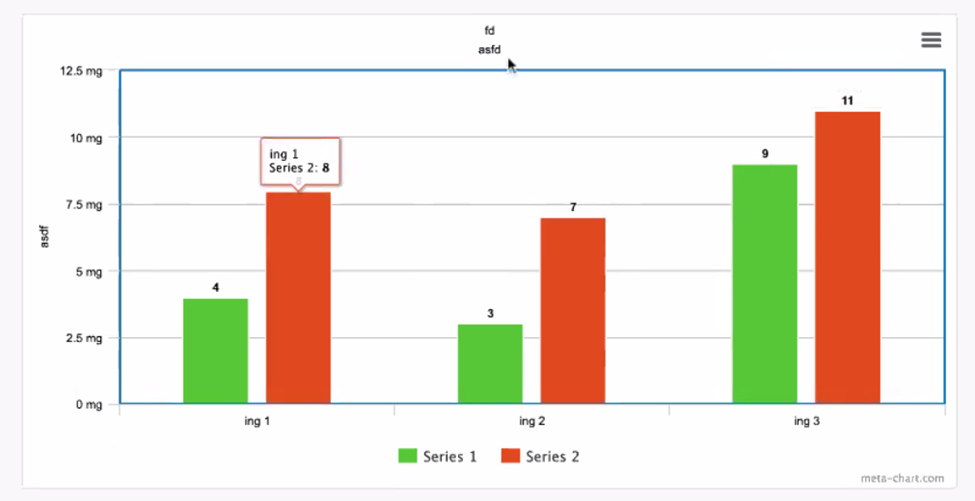




# INTERACTIVE OUTPUT :

ALL INGREDIENTS  will be displayed unlike the Graph which displays the Top 10 Ingredients. The DETAILED Description mentioned by Sreesaketh in the EXCEL Sheet should be displayed while the Mouse Clicked on each Ingredient.

**SAMPLE : As shown below**

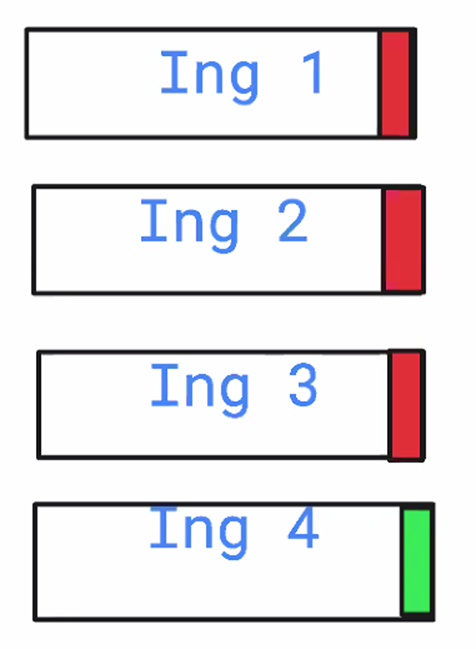

<hr><hr>